In [1]:
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from astropy.modeling import models, fitting

import jungfrau_utils as ju
from alvra_tools import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm
from alvra_tools.channels import *

[INFO][corrections] Numba not available, reverting to Numpy


### Location of the BSREAD file with PSSS data and the file with corrected images

In [2]:
bsread_file = "/das/work/p17/p17984/karol/PSSS/run_000096.BSREAD.h5"
images_file = "/das/work/p17/p17984/karol/PSSS/run_000096.JF06T08V01.h5"

### Load the PSSS data from BSREAD file using alvra_tools

In [3]:
(Energy, FWHM, X, Y, pulseID) = \
load_PSSS_data_from_scans_pulseID(bsread_file,channel_PSSS_center, 50)

### Load the images and pulse_ids of images with hits using alvra_tools

In [4]:
(Images, pulseID_img) = load_corr_JF_data(images_file)

### Filter out spectra that don't have corresponding JF images

In [32]:
X_filtered = []
Y_filtered = []
Energy_filtered = []

# find matching pulseID's
for i in range(0, len(pulseID_img)):
    for j in range(0, len(pulseID)):
        if pulseID_img[i] == pulseID[j]:
            
            X_filtered.append(X[j])
            Y_filtered.append(Y[j])
            en = float(Energy[j])
            Energy_filtered.append(en)
        

X_filtered = np.asarray(X_filtered)
Y_filtered = np.asarray(Y_filtered)
#Energy_filtered = np.asarray(Energy_filtered)

In [33]:
Energy_filtered

[11288.024861626825,
 11297.131909013615,
 11295.898533976262,
 11292.529104063678,
 11292.29669033528,
 11285.73308425599,
 11292.569146739153,
 11286.54235716897,
 11286.257235341693,
 11284.428041093759,
 11292.999022953454,
 11283.483689370918,
 11298.217004172002,
 11288.79854447555,
 11282.80564655226,
 11288.936037019797,
 11291.995724459508,
 11299.22199457729,
 11289.81398147775,
 11289.681851984855,
 11293.068652339636,
 11293.905236132401,
 11284.47216849049,
 11297.715077799245,
 11299.559492570863,
 11285.452532739204,
 11289.15303175544,
 11294.801207919567,
 11285.529807985606,
 11287.444967892136,
 11282.241670482614,
 11302.301581817977,
 11293.507681615756,
 11282.468473248042,
 11293.5025415887,
 11284.983543502472,
 11287.24202244579,
 11282.675960904759,
 11289.8898751899,
 11292.552850351934,
 11283.584885382295,
 11287.169033824346,
 11290.26171420004,
 11288.883856801365,
 11286.43519908109,
 11297.614805632154,
 11295.228099305255,
 11288.028313225634,
 11288.6

In [35]:
Energy_filtered.shape

AttributeError: 'list' object has no attribute 'shape'

### Plot single spectra

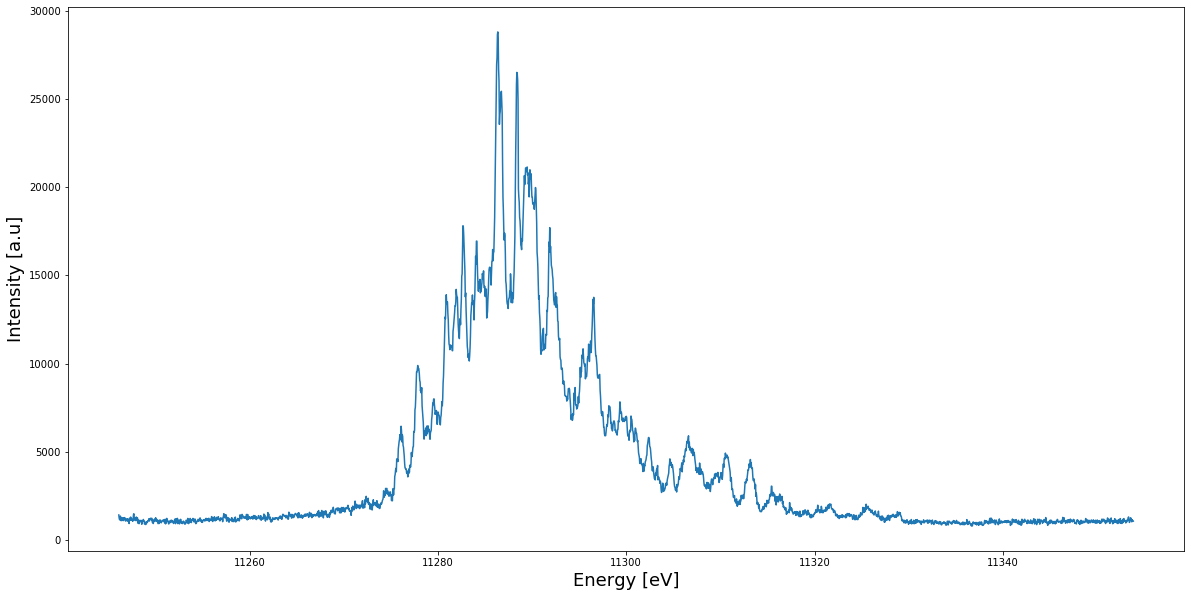

In [36]:
plt.figure(figsize=(20,10))
plt.plot(X[0], Y_filtered[0])
plt.xlabel('Energy [eV]', fontsize=18)
plt.ylabel('Intensity [a.u]', fontsize=18)
plt.show()

### Smooth spectra

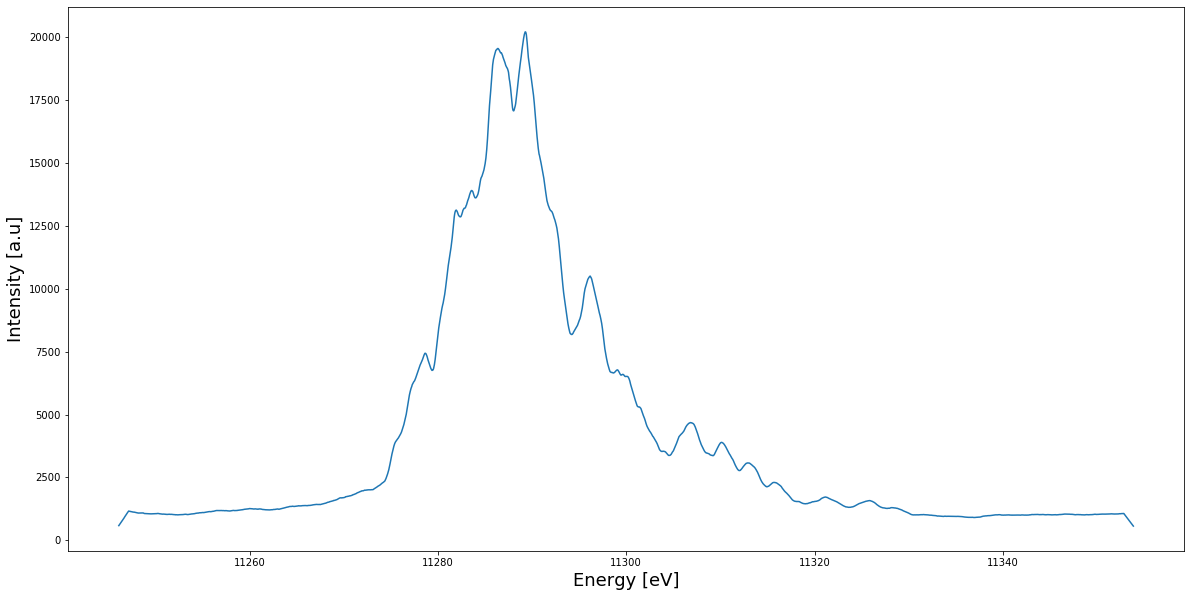

In [37]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.figure(figsize=(20,10))
plt.plot(X[0], smooth(Y_filtered[0],50))
plt.xlabel('Energy [eV]', fontsize=18)
plt.ylabel('Intensity [a.u]', fontsize=18)
plt.show()

### Fit the smoothed spectra with astopy

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean             stddev     
    ------------------ ------------------ ----------------
    16418.112613548885 11288.331276913183 8.20355030325777
[11291.49379497]
9969295278


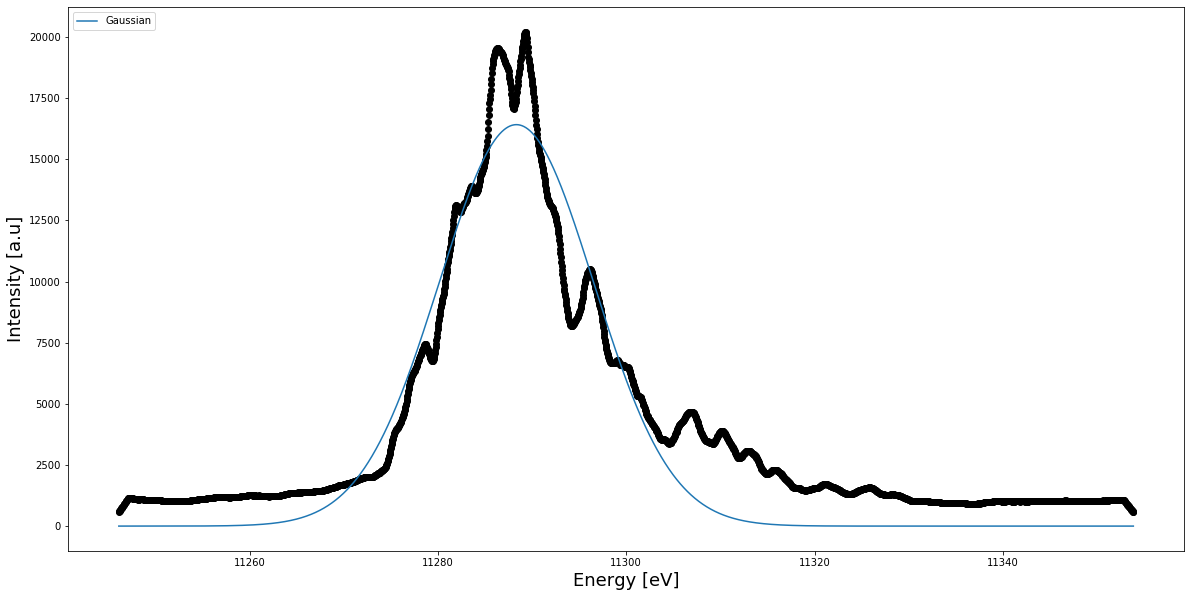

In [38]:
x = X[0]
y = smooth(Y_filtered[0],50)

#g_init = models.Gaussian1D(amplitude=10000., mean=11210, stddev=15.)
g_init = models.Gaussian1D(amplitude=40000., mean=11200, stddev=19.)

fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(20,10))
plt.plot(x, y, 'ko')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Energy [eV]', fontsize=18)
plt.ylabel('Intensity [a.u]', fontsize=18)
plt.legend(loc=2)
print(g)
print(Energy[8])
print(pulseID[8])

### Fit all single spectra 

In [40]:
g_init = models.Gaussian1D(amplitude=40000., mean=11200, stddev=19.)
fit_g = fitting.LevMarLSQFitter()

Energy_fit_mean = []
Energy_fit_amp = []
Energy_fit_std = []

for i in range(0,len(Y_filtered)):
    y = smooth(Y_filtered[i],50)
    g = fit_g(g_init, x, y)
    
    Energy_fit_mean.append(g.mean.value)
    Energy_fit_amp.append(g.amplitude.value)
    Energy_fit_std.append(g.stddev.value)

In [41]:
Energy_fit_mean

[11288.331276913183,
 11297.30460313348,
 11296.219119002588,
 11292.775609303704,
 11292.574369701615,
 11286.068077240672,
 11292.943484149268,
 11286.928690952245,
 11286.40966402965,
 11284.595214223142,
 11293.403499566075,
 11283.694662486849,
 11298.56621533076,
 11290.000345305762,
 11283.324809219543,
 11289.680710200191,
 11292.10686989209,
 11299.436698976198,
 11290.260317762404,
 11289.895390616033,
 11293.343544200778,
 11294.126074412827,
 11284.586346230484,
 11298.037076675762,
 11299.840587800754,
 11285.576577615338,
 11289.370733050455,
 11295.106237389153,
 11285.635993636628,
 11287.88578489605,
 11282.393226232467,
 11302.623238096505,
 11293.689276770543,
 11282.562991859339,
 11293.865102059903,
 11285.226113259116,
 11287.453140353113,
 11282.680864784086,
 11290.414563706374,
 11293.054042315574,
 11172.247603110076,
 11287.379747772036,
 11290.621443361124,
 11289.60015119509,
 11286.776892588072,
 11297.918926871736,
 11295.446896435582,
 11288.692133141427

### Reshape arrays (that was a bad idea...)

In [ ]:
#Energy_fit_mean = np.reshape(Energy_fit_mean, (-1,1))
#Energy_fit_amp = np.reshape(Energy_fit_amp, (-1,1))
#Energy_fit_std = np.reshape(Energy_fit_std, (-1,1))
#Energy_fit_mean.shape
#Energy_fit_mean

### Save the hdf5 file with images, pulseIDs, energy from PSSS and from the fit

In [42]:
save_file = '/das/work/p17/p17984/karol/PSSS/run_000096.energy.JF06T08V01.h5'
#save(save_file, data=Images, pulse_id=pulseID_img, energy_psss=Energy_filtered, energy_fit=Energy_fit_filtered)
save(save_file, data=Images, pulse_id=pulseID_img, energy_psss=Energy_filtered, energy_fit=Energy_fit_mean)

### Check what's in the saved file

In [ ]:
jf_file = h5py.File(save_file)
print(jf_file)
#channel_raw_JF_images = "/data/JF06T08V01/data"

en_psss = jf_file['energy_psss']
en_fit = jf_file['energy_fit']

print(en_psss[0:3])
print(en_fit[0:3])